# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
#https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

url = "http://api.openweathermap.org/data/2.5/weather?"



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    
        # Parse the JSON and retrieve data
    city_weather = requests.get(city_url+city).json()
  
    try:
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | lolua
City not found. Skipping...
Processing Record 4 of Set 1 | chala
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | abu samrah
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | umba
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | luwuk
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | andenes
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | maceio
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | hamban

Processing Record 39 of Set 4 | ixtapa
Processing Record 40 of Set 4 | rolim de moura
City not found. Skipping...
Processing Record 41 of Set 4 | gornyy
Processing Record 42 of Set 4 | nishihara
Processing Record 43 of Set 4 | lorengau
Processing Record 44 of Set 4 | praia da vitoria
Processing Record 45 of Set 4 | talovyy
Processing Record 46 of Set 4 | vila velha
Processing Record 47 of Set 4 | jalu
Processing Record 48 of Set 4 | norman wells
Processing Record 49 of Set 4 | katsuura
Processing Record 0 of Set 5 | los llanos de aridane
Processing Record 1 of Set 5 | whitianga
Processing Record 2 of Set 5 | bluff
Processing Record 3 of Set 5 | tual
Processing Record 4 of Set 5 | talara
Processing Record 5 of Set 5 | randvere
City not found. Skipping...
Processing Record 6 of Set 5 | pangnirtung
Processing Record 7 of Set 5 | itupiranga
Processing Record 8 of Set 5 | tromso
Processing Record 9 of Set 5 | bandarbeyla
Processing Record 10 of Set 5 | griffith
Processing Record 11 of Set 5

Processing Record 31 of Set 8 | souillac
Processing Record 32 of Set 8 | tabukiniberu
City not found. Skipping...
Processing Record 33 of Set 8 | sao paulo de olivenca
Processing Record 34 of Set 8 | tieling
Processing Record 35 of Set 8 | andra
Processing Record 36 of Set 8 | kavieng
Processing Record 37 of Set 8 | bonavista
Processing Record 38 of Set 8 | comodoro rivadavia
Processing Record 39 of Set 8 | zhemtala
Processing Record 40 of Set 8 | ayapel
Processing Record 41 of Set 8 | gladstone
Processing Record 42 of Set 8 | kamaishi
Processing Record 43 of Set 8 | kegayli
City not found. Skipping...
Processing Record 44 of Set 8 | nefteyugansk
Processing Record 45 of Set 8 | kalmunai
Processing Record 46 of Set 8 | araouane
Processing Record 47 of Set 8 | komsomolskiy
Processing Record 48 of Set 8 | manokwari
Processing Record 49 of Set 8 | pag
Processing Record 0 of Set 9 | uhlove
Processing Record 1 of Set 9 | wamba
Processing Record 2 of Set 9 | uray
Processing Record 3 of Set 9 

Processing Record 15 of Set 12 | porto novo
Processing Record 16 of Set 12 | nawalapitiya
Processing Record 17 of Set 12 | zavyalovo
Processing Record 18 of Set 12 | brae
Processing Record 19 of Set 12 | goundam
Processing Record 20 of Set 12 | mana
Processing Record 21 of Set 12 | governador valadares
Processing Record 22 of Set 12 | kologriv
Processing Record 23 of Set 12 | lucea
Processing Record 24 of Set 12 | batemans bay
Processing Record 25 of Set 12 | kiboga
Processing Record 26 of Set 12 | dali
Processing Record 27 of Set 12 | baboua
City not found. Skipping...
Processing Record 28 of Set 12 | tautira
Processing Record 29 of Set 12 | clarence town
Processing Record 30 of Set 12 | meulaboh
Processing Record 31 of Set 12 | wasilla
Processing Record 32 of Set 12 | fort dodge
Processing Record 33 of Set 12 | xichang
Processing Record 34 of Set 12 | bairiki
Processing Record 35 of Set 12 | seddon
Processing Record 36 of Set 12 | mitoc
Processing Record 37 of Set 12 | sangar
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df= pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cherskiy,68.7500,161.3000,231.16,100,100,2.12,RU,1674346508
1,chala,-7.5833,31.2667,286.90,98,100,1.12,TZ,1674346509
2,georgetown,5.4112,100.3354,298.12,88,20,2.57,MY,1674346510
3,abu samrah,35.3029,37.1841,281.85,68,0,1.82,SY,1674346511
4,mataura,-46.1927,168.8643,288.61,51,58,2.22,NZ,1674346455


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cherskiy,68.7500,161.3000,231.16,100,100,2.12,RU,1674346508
1,chala,-7.5833,31.2667,286.90,98,100,1.12,TZ,1674346509
2,georgetown,5.4112,100.3354,298.12,88,20,2.57,MY,1674346510
3,abu samrah,35.3029,37.1841,281.85,68,0,1.82,SY,1674346511
4,mataura,-46.1927,168.8643,288.61,51,58,2.22,NZ,1674346455


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

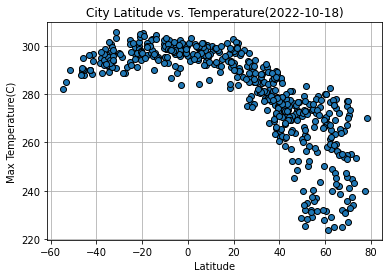

In [8]:
# Build scatter plot for latitude vs. temperature

plt.plot(city_data_df["Lat"],city_data_df["Max Temp"],"o", mec= 'k')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs. Temperature(2022-10-18)')
plt.grid()


# Incorporate the other graph properties


# Save the figure
plt.savefig("output_data/Fig1.png")



#### Latitude Vs. Humidity

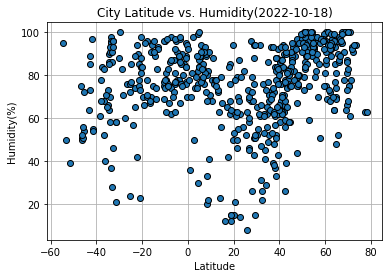

In [10]:
plt.plot(city_data_df["Lat"],city_data_df["Humidity"],"o", mec= 'k')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity(2022-10-18)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

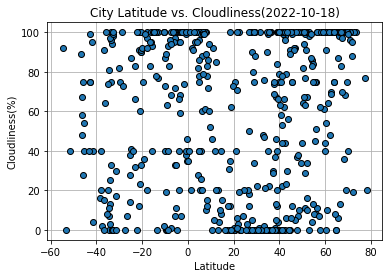

In [11]:
plt.plot(city_data_df["Lat"],city_data_df["Cloudiness"],"o", mec= 'k')
plt.xlabel('Latitude')
plt.ylabel('Cloudliness(%)')
plt.title('City Latitude vs. Cloudliness(2022-10-18)')
plt.grid()




# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

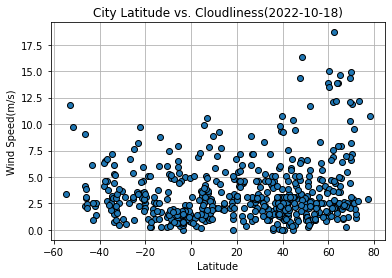

In [12]:
plt.plot(city_data_df["Lat"],city_data_df["Wind Speed"],"o", mec= 'k')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs. Cloudliness(2022-10-18)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cherskiy,68.7500,161.3000,231.16,100,100,2.12,RU,1674346508
2,georgetown,5.4112,100.3354,298.12,88,20,2.57,MY,1674346510
3,abu samrah,35.3029,37.1841,281.85,68,0,1.82,SY,1674346511
6,umba,66.6871,34.3429,265.28,95,83,2.60,RU,1674346514
13,andenes,69.3143,16.1194,277.00,81,75,14.40,NO,1674346518


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']<0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,chala,-7.5833,31.2667,286.90,98,100,1.12,TZ,1674346509
4,mataura,-46.1927,168.8643,288.61,51,58,2.22,NZ,1674346455
5,rikitea,-23.1203,-134.9692,299.44,74,32,8.21,PF,1674346458
7,lebu,-37.6167,-73.6500,288.88,84,2,6.48,CL,1674346492
8,bredasdorp,-34.5322,20.0403,291.35,86,7,2.40,ZA,1674346460


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7929635932208907


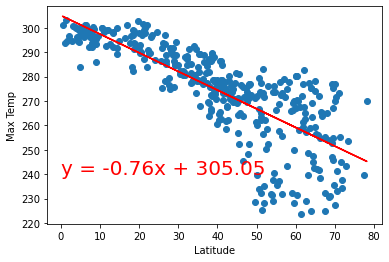

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(0,240),fontsize=20,color="red")
plt.show()



The r-value is: 0.4740673947029755


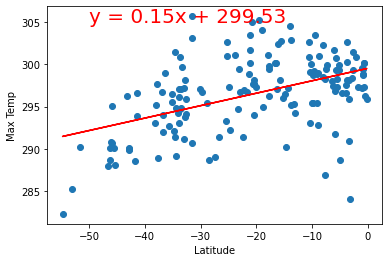

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(-50,305),fontsize=20,color="red")
plt.show()


**Discussion about the linear relationship:** In Northern Hemisphere the r value is close to -1, which implies Temperature and Latitude are negatively related. As the Latitude gets higher Temperature gets lower.
In Southern Hemisphere, the r value is 0.35, which does not indicates weak positive relationship between the Latitude and Temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3479117425511935


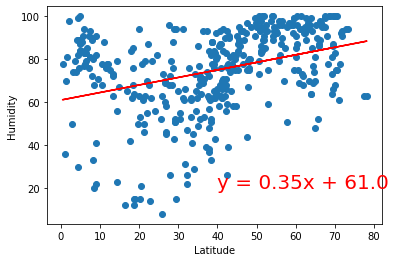

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(40,20),fontsize=20,color="red")
plt.show()

The r-value is: 0.35951791579559395


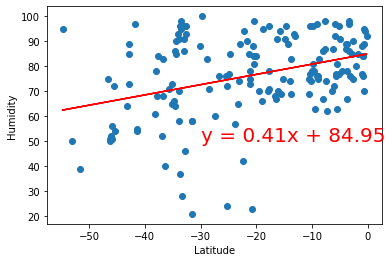

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(-30,50),fontsize=20,color="red")
plt.show()

**Discussion about the linear relationship:** In Northern Hempisphere, the r value is 0.46, which implies the Latitude and Humidity have moderate positive relationship. 
In Southern Hemisphere, the r value is 0.47, which is also close to 0.5 which means latitude and humdity have moderate positive relationship. In, conclusion, it can be said Humdity increases with latitude increase.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.24122647585574764


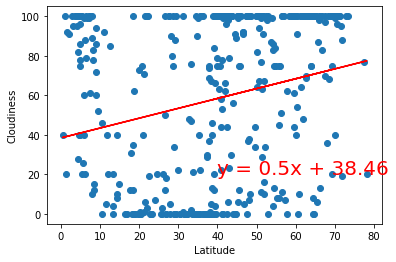

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(40,20),fontsize=20,color="red")
plt.show()

The r-value is: 0.22295115795569517


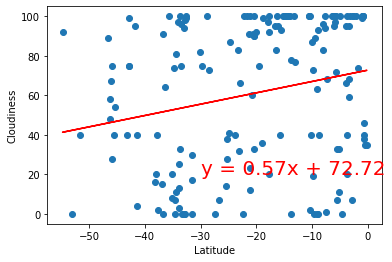

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(-30,20),fontsize=20,color="red")
plt.show()

**Discussion about the linear relationship:** In Northern and Southern both Hemispheres, r value is between 0.3 to 0.5, which implies, Latitude and Cloudiness have weak positive relationship. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.18587419156344429


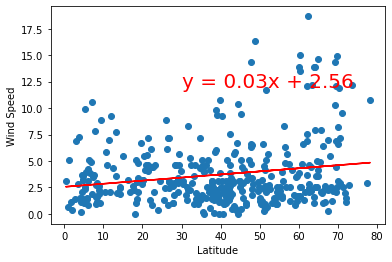

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(30,12),fontsize=20,color="red")
plt.show()

The r-value is: -0.3050879617969597


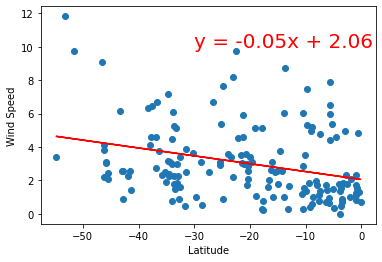

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(-30,10),fontsize=20,color="red")
plt.show()

**Discussion about the linear relationship:** In Northern Hemisphere, r value is almost 0, which indicates there is no relationship between Latitude and Wind Speed. In Southern Hemipshere, r value is negative -0.30, that implies, there is very weak negative relationship between Latitude and Wind Speed.